## Autoencoder with only one hidden layer


We construct a 3 layer architecture, using the middle layer as an encoded latent space. Then the training is carried out over the cost function,

$$
 \mathcal{L} (\hat{x} - x)
$$

Where, $\mathbf{\hat{x}}$ is the reconstructed data(images).

In [ ]:
# Upload dataset
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
# Claim models
import keras
import matplotlib.pyplot as plt

# The input size/image
input_img = keras.Input(shape=(784,))
# The size of latent space
encoding_dim = 64
## Add a simple encode layer
# encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# You can add encode layer with a L1 activity regularizer
encoded = keras.layers.Dense(encoding_dim, activation='relu', 
                activity_regularizer=keras.regularizers.l1(10e-5))(input_img)
# Add decode layer
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# Claim autoencoder model
model_autoencoder = keras.Model(input_img, decoded)

# Claim a separate encoder model
model_encoder = keras.Model(input_img, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_autoencoder.layers[-1]
# Create the decoder model
model_decoder = keras.Model(decoder_input, decoder_layer(decoder_input))


Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.3578 - val_loss: 0.1732
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1643 - val_loss: 0.1401
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1363 - val_loss: 0.1227
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1210 - val_loss: 0.1121
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1109 - val_loss: 0.1050
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1045 - val_loss: 0.1001
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1000 - val_loss: 0.0967
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0968 - val_loss: 0.0942
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0946 - val_loss: 0.0922
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0926 - val_lo

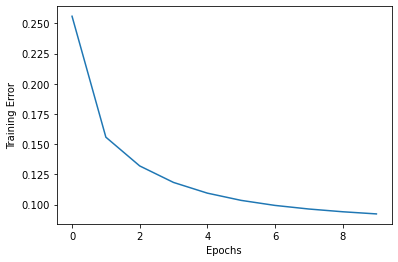

In [ ]:
# Training
# Claim compile property for training
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
hist=model_autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

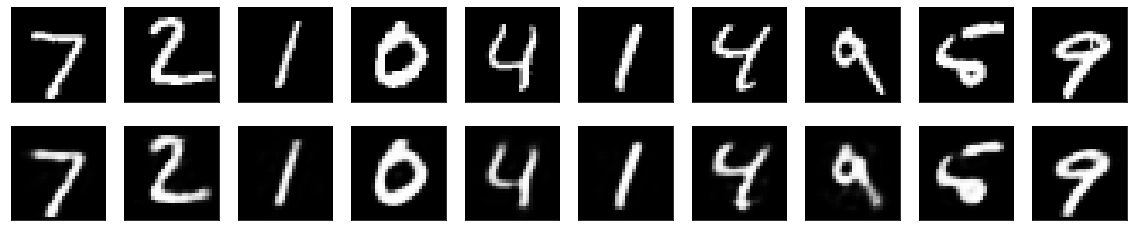

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = model_encoder.predict(x_test)
decoded_imgs = model_decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Supervised Classification with AEs

In [ ]:
model = keras.Sequential()
model.add(model_encoder.layers[0])
model.add(model_encoder.layers[1])
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train, one_hot_labels, epochs=10, batch_size=32)



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# Overall F1 score
y_pred=np.argmax(model.predict(x_test), axis=1)
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.9729866299888146
0.9731408419266317
0.972894804869916
